In [3]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns 
import matplotlib.pyplot as plt 
# for building model 
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

In [4]:
import pandas as pd
df_black_friday_sales = pd.read_csv('./train.csv') 

print(df_black_friday_sales.head()) 


   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [5]:
print( df_black_friday_sales.isna().any() )

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool


In [6]:
# total number of null values 
df_black_friday_sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
#finding duplicates 
df_black_friday_sales[df_black_friday_sales.duplicated()].count().sum()


0

In [13]:
df_black_friday_sales.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,0.634181
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,0.801829
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,0.653597
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,0.224059
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,0.544616
...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,F,46-50,0,B,4+,1,3,4.0,12.0,0.335505
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,0.688171
545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,10.0,0.142511
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,0.654808


In [8]:
from sklearn.preprocessing import MinMaxScaler 

#instance of MinMaxScaler 
scaler = MinMaxScaler() 

# Aapplying scaling to 'Purchase' column 
df_black_friday_sales['Purchase'] = scaler.fit_transform(df_black_friday_sales[['Purchase']]) 

print( df_black_friday_sales.head() )

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN  0.348992  
1                 6.0                14.0  0.634181  
2                 NaN                 NaN  0

In [15]:
# mapping 
age_mapping = { 
	'0-17': 'toddler', 
	'18-25': 'young_adult', 
	'26-35': 'adult', 
	'36-45': 'middle_age', 
	'46-50': 'mid_age', 
	'51-55': 'older_adult', 
	'55+': 'elderly'
} 

# Replace values in the 'Age' column 
df_black_friday_sales['Age_new'] = df_black_friday_sales['Age'].map(age_mapping) 

df_black_friday_sales = pd.get_dummies(df_black_friday_sales, columns=['Age_new'], drop_first=True) 

# label encoding 
cols = ['City_Category', 'Stay_In_Current_City_Years'] 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
for col in cols: 
	df_black_friday_sales[col] = le.fit_transform(df_black_friday_sales[col]) 
df_black_friday_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new_elderly,Age_new_mid_age,Age_new_middle_age,Age_new_older_adult,Age_new_toddler,Age_new_young_adult
0,1000001,P00069042,F,0-17,10,0,2,0,3,NaN,NaN,0.348992,False,False,False,False,True,False
1,1000001,P00248942,F,0-17,10,0,2,0,1,6.0,14.0,0.634181,False,False,False,False,True,False
2,1000001,P00087842,F,0-17,10,0,2,0,12,NaN,NaN,0.058875,False,False,False,False,True,False
3,1000001,P00085442,F,0-17,10,0,2,0,12,14.0,NaN,0.043634,False,False,False,False,True,False
4,1000002,P00285442,M,55+,16,2,4,0,8,NaN,NaN,0.332248,True,False,False,False,False,False


In [16]:
df_black_friday_sales.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_new_elderly,Age_new_mid_age,Age_new_middle_age,Age_new_older_adult,Age_new_toddler,Age_new_young_adult
1,1000001,P00248942,F,0-17,10,0,2,0,1,6.0,14.0,0.634181,False,False,False,False,True,False
6,1000004,P00184942,M,46-50,7,1,2,1,1,8.0,17.0,0.801829,False,True,False,False,False,False
13,1000005,P00145042,M,26-35,20,0,1,1,1,2.0,5.0,0.653597,False,False,False,False,False,False
14,1000006,P00231342,F,51-55,9,0,1,0,5,8.0,14.0,0.224059,False,False,False,True,False,False
16,1000006,P0096642,F,51-55,9,0,1,0,2,3.0,4.0,0.544616,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,F,46-50,0,1,4,1,3,4.0,12.0,0.335505,False,True,False,False,False,False
545904,1006040,P00081142,M,26-35,6,1,2,0,6,8.0,14.0,0.688171,False,False,False,False,False,False
545907,1006040,P00277642,M,26-35,6,1,2,0,2,3.0,10.0,0.142511,False,False,False,False,False,False
545908,1006040,P00127642,M,26-35,6,1,2,0,1,2.0,15.0,0.654808,False,False,False,False,False,False


In [17]:
#data analysis and visualization
#Data analysis means exploring, examining and interpreting the dataset to find the links that support decision-making. 
#Data analysis involves the analysis of both the quantitative and qualitative data and the relationships between them. 
#In this section we’ll deep dive into the analysis of our “tips” dataset.
print("Dimensions of the dataset: ", df_black_friday_sales.shape, "\n\n")
print("Summary of dataset: ", df_black_friday_sales.info() )

Dimensions of the dataset:  (550068, 18) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  Age_new_elderly             

In [18]:
# unique values for columns 
unique_values_gender = df_black_friday_sales['Gender'].unique() 
unique_values_age = df_black_friday_sales['Age'].unique() 
unique_values_city_category = df_black_friday_sales['City_Category'].unique() 

print("\nUnique values for 'Gender':", unique_values_gender) 
print("\nUnique values for 'Age':", unique_values_age) 
print("\nUnique values for 'City_Category':", unique_values_city_category) 


Unique values for 'Gender': ['F' 'M']

Unique values for 'Age': ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values for 'City_Category': [0 2 1]


In [20]:
df_black_friday_sales['Gender'].replace(['M','F'],[0,1],inplace=True) 
print(df_black_friday_sales['Gender'].head() )

0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int64


In [21]:
#EDA stands for Exploratory Data Analysis. EDA refers to understand the data 
#and find the relationships between different features so that the dataset is prepared for 
#model building.By performing EDA , one can gain the deep understanding of dataset . 
#There are mainly four types of EDA: Univariate non-graphical, Univariate graphical , 
#Multivariate nongraphical and Multivariate graphical.

#Lets start with the descriptive statistics of our dataset. We’ll use the pandas library of Python as shown below : 
print(df_black_friday_sales.describe() )

            User_ID         Gender     Occupation  City_Category  \
count  5.500680e+05  550068.000000  550068.000000  550068.000000   
mean   1.003029e+06       0.246895       8.076707       1.042640   
std    1.727592e+03       0.431205       6.522660       0.760211   
min    1.000001e+06       0.000000       0.000000       0.000000   
25%    1.001516e+06       0.000000       2.000000       0.000000   
50%    1.003077e+06       0.000000       7.000000       1.000000   
75%    1.004478e+06       0.000000      14.000000       2.000000   
max    1.006040e+06       1.000000      20.000000       2.000000   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
count               550068.000000   550068.000000       550068.000000   
mean                     1.858418        0.409653            5.404270   
std                      1.289443        0.491770            3.936211   
min                      0.000000        0.000000            1.000000   
25%                   

In [25]:
#printing the data types
print("Data types:\n")
print(df_black_friday_sales.dtypes)
#get unique values for city category column
unique_values = df_black_friday_sales["City_Category"].unique()
print("\nUnique values in 'City_Catogory': ")
print(unique_values)

Data types:

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                            object
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age_new_elderly                  bool
Age_new_mid_age                  bool
Age_new_middle_age               bool
Age_new_older_adult              bool
Age_new_toddler                  bool
Age_new_young_adult              bool
dtype: object

Unique values in 'City_Catogory': 
[0 2 1]


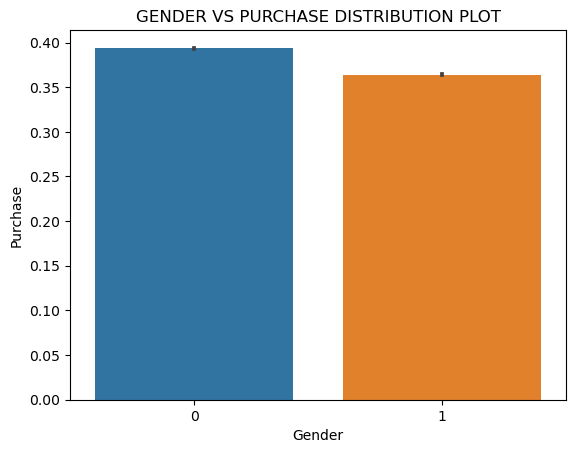

In [26]:
#Data visualization
#As we know that the large and complex datasets are very difficult
#to understand but they can be easily understood with the help of graphs. Graphs/Plots 
#can help in determining relationships between different entities and helps in comparing variables/features. 
#Data Visulaisation means presenting the large and complex data in the form of graphs so that they are easily understandable.
#We’ll use a Python Library called Matplotlib for data visualisation with Jupyter Notebook.
#Now let’s begin by creating a bar plot that compares the percentage ratio of tips given by each gender , along with that we’ll make another graph
#to compare the average tips given by individuals of each gender.
#barplot for comparing gender and their purchases
sns.barplot(data = df_black_friday_sales, x="Gender",y="Purchase", )
plt.title("GENDER VS PURCHASE DISTRIBUTION PLOT")

plt.show()

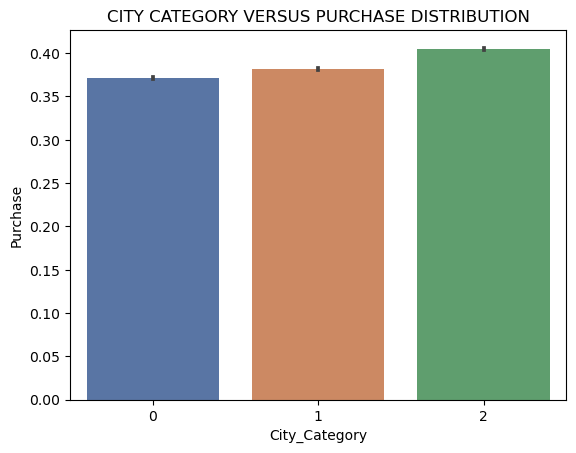

In [27]:
#city category versus purchase distribution
sns.barplot(data = df_black_friday_sales,x="City_Category",y="Purchase", palette = "deep")
plt.title("CITY CATEGORY VERSUS PURCHASE DISTRIBUTION")

plt.show()

C:\Users\Baha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


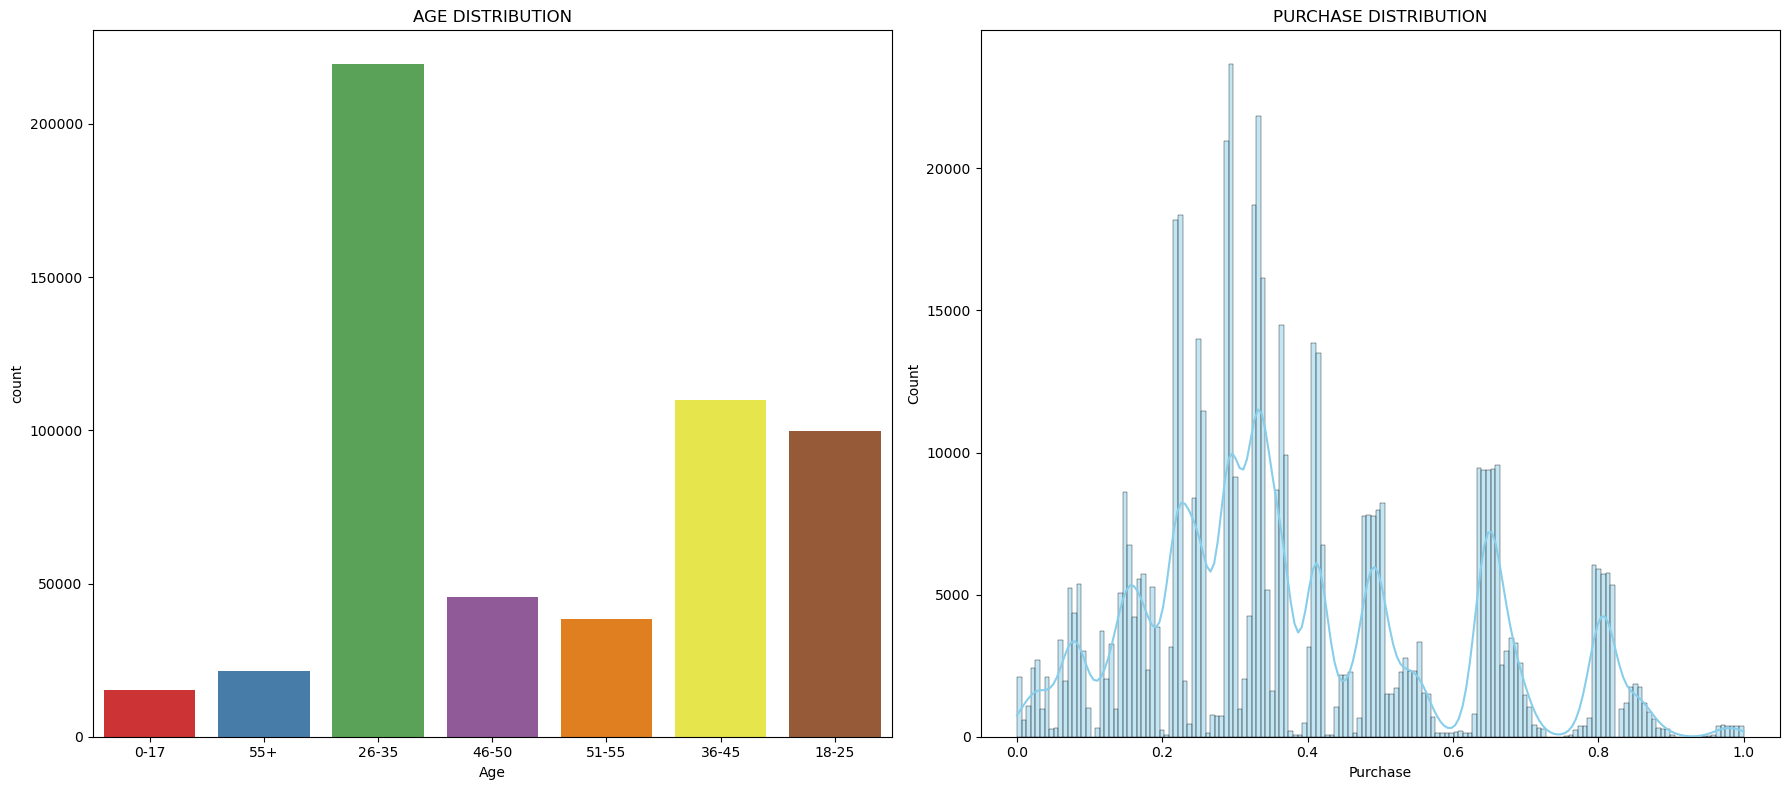

In [29]:
# two subplots side by side. The first subplot displays a count plot of the ‘Age’ column from the ‘df_black_friday_sales’ DataFrame, 
#while the second subplot shows a histogram and kernel density estimate (KDE) of the ‘Purchase’ column. 
fig, axes = plt.subplots(1, 2, figsize=(18,8))
#age distribution (count plot of age column)
sns.countplot(x="Age", data = df_black_friday_sales, palette ="Set1", ax = axes[0])
axes[0].set_title("AGE DISTRIBUTION")

#purchase distribution (histplot of the purchase column)
sns.histplot(df_black_friday_sales["Purchase"], kde=True, color = "skyblue", ax=axes[1])
axes[1].set_title("PURCHASE DISTRIBUTION")

plt.tight_layout()

plt.show()

City_Category
0    0.371620
1    0.381615
2    0.405358
Name: Purchase, dtype: float64


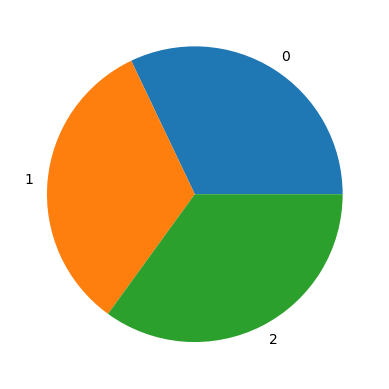

In [31]:
#Here code calculates the average purchase (‘Purchase’) for each city category (‘City_Category’) 
#using a groupby operation and then prints the resulting purchase comparison. 
#comparison of purchases between cities
purchase_comp = df_black_friday_sales.groupby("City_Category")["Purchase"].mean()
print(purchase_comp)

plt.pie(purchase_comp,labels =["0","1","2"])
plt.show()

In [39]:
#MODEL BUILDING
#As we are going to build a model , we have to split our data to test and train , and we’ll use the train data to 
#train our model and will use the test data to test the accuracy of our model. 
df_cleaned = df_black_friday_sales.dropna()
X = df_cleaned.drop(columns=['User_ID', 'Product_ID', 'Purchase','Age'])
y = df_cleaned['Purchase']

Results
MSE: 0.19376907342672955
CV Score: 0.1934247822538331


<Axes: title={'center': 'Model Coefficients'}>

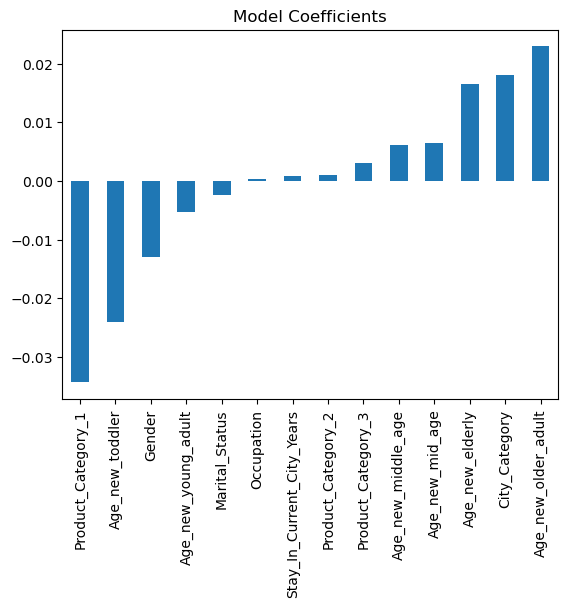

In [40]:
#Now lets write a create a function to train our model. We’ll be using Linear Regression model from sklearn library
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 

def train(model, X, y): 
	# train-test split 
	x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25) 
	model.fit(x_train, y_train) 
	
	# predict the results 
	pred = model.predict(x_test) 
	
	# cross validation 
	cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5) 
	cv_score = np.abs(np.mean(cv_score)) 
	
	print("Results") 
	print("MSE:", np.sqrt(mean_squared_error(y_test, pred))) 
	print("CV Score:", np.sqrt(cv_score)) 

	
model = LinearRegression() 
train(model, X, y) 
coef = pd.Series(model.coef_, X.columns).sort_values() 
coef.plot(kind='bar', title='Model Coefficients')

In [ ]:
# Save the notebook
!jupyter nbconvert --to notebook --execute visualization.ipynb

# Export the notebook to HTML
!jupyter nbconvert --to html visualization.ipynb